In [1]:
import phoebe
import numpy as np
import matplotlib.pyplot as plt

Initialize the bundle with the chosen parameters:

In [2]:
b = phoebe.default_binary()

b.add_dataset('lc', passband='Johnson:V', dataset='mylcV')
b.add_dataset('lc', passband='Johnson:B', dataset='mylcB')
b.add_dataset('rv', passband='Johnson:V', dataset='myrv')

b.add_compute(kind='phoebe', compute='mymodel')

b['sma@binary'] = 9.435
b['requiv@primary'] = 1.473
b['requiv@secondary'] = 0.937
b['incl@binary'] = 87.35
b['period@binary'] = 2.345678901
b['q@binary'] = 0.888
b['teff@primary'] = 6342.
b['teff@secondary'] = 5684.
b['t0@system'] = 1.23456789
b['ecc@orbit'] = 0.148
b['per0@orbit'] = 65.5
b['vgamma@system'] = 185.5

b.set_value_all('pblum_mode', 'absolute')
b.set_value('distance', 1.23)

t = np.arange(1., 10.35, 29.44/1440)
t_rv = 100. + np.random.rand(14) * 50

b['times@mylcV@dataset'] = t
b['times@mylcB@dataset'] = t
b['times@rv@primary@dataset'] = t_rv
b['times@rv@secondary@dataset'] = t_rv
b.run_compute('mymodel')

100%|████████████████████████████████████████| 472/472 [37:50<00:00,  4.81s/it]


<ParameterSet: 9 parameters | kinds: lc, rv>

Add noise:

In [3]:
np.random.seed(1)
noiseV = 0.006 * np.exp( 0.4 + (t-t[0])/(t[-1]-t[0]) ) + np.random.normal(0.0, 0.003, len(t)) - 0.002*(t-t[0])**2/(t[-1]-t[0])**2 + 0.001*(t-t[0])/(t[-1]-t[0]) + 0.0002
noiseV -= np.mean(noiseV)

np.random.seed(42)
noiseB = 0.006 * np.exp( 0.4 + (t-t[0])/(t[-1]-t[0]) ) + np.random.normal(0.0, 0.003, len(t)) - 0.002*(t-t[0])**2/(t[-1]-t[0])**2 + 0.001*(t-t[0])/(t[-1]-t[0]) + 0.0002
noiseB -= np.mean(noiseB)

noise_rv1 = np.random.normal(0, 2.5, len(t_rv))
noise_rv2 = np.random.normal(0, 3.5, len(t_rv))

Save the files:

(<autofig.figure.Figure | 2 axes | 4 call(s)>,
 <Figure size 576x864 with 2 Axes>)

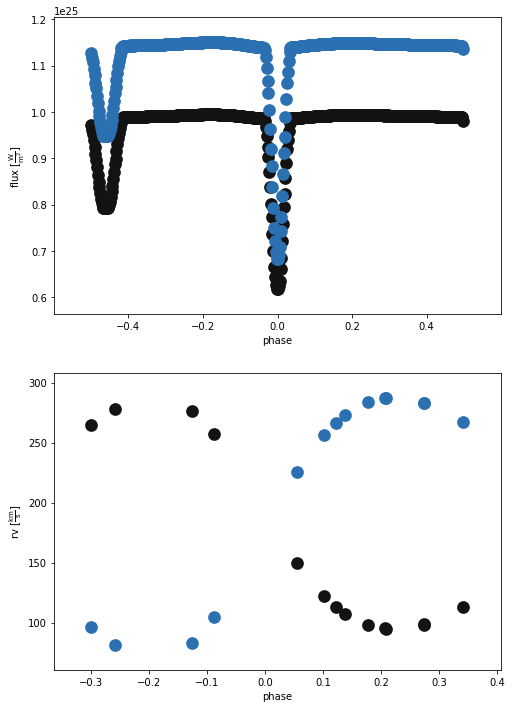

In [5]:
with open('fitting2_files/lc.V.data', 'w') as f:
    for i in range(len(t)):
        f.write('%f  %f  %f\n' % (b['value@times@mylcV@mymodel'][i], b['value@fluxes@mylcV@mymodel'][i] + noiseV[i], 0.0003))

with open('fitting2_files/lc.B.data', 'w') as f:
    for i in range(len(t)):
        f.write('%f  %f  %f\n' % (b['value@times@mylcB@mymodel'][i], b['value@fluxes@mylcB@mymodel'][i] + noiseB[i], 0.0003))

with open('fitting2_files/rv1.data', 'w') as f:
    for i in range(len(t_rv)):
        f.write('%f  %f  %f\n' % (b['value@times@primary@myrv@mymodel'][i], b['value@rvs@primary@myrv@mymodel'][i] + noise_rv1[i], 2.5))

with open('fitting2_files/rv2.data', 'w') as f:
    for i in range(len(t_rv)):
        f.write('%f  %f  %f\n' % (b['value@times@secondary@myrv@mymodel'][i], b['value@rvs@secondary@myrv@mymodel'][i] + noise_rv2[i], 3.5))

b.plot(x='phase', marker='o', linestyle='None', save='lc.png')